In [5]:
from src.services.data_converter_service import DataConverterService
from src.services.predict_symbols_service import PredictSymbolsService
from src.utils.convert_points_to_bounding_box import convert_points_to_bounding_box

data_converter_service = DataConverterService()
datapoints  = data_converter_service.load_dataset()

datapoints_to_test = datapoints[:10]

In [6]:

pid_results = []
for dp_sample in datapoints_to_test:
    predict_service = PredictSymbolsService(
        image_path=dp_sample.image_path
    )
    pid_results.append(
        predict_service.predict_bounding_boxes()
    )


0: 1088x1088 (no detections), 178.2ms
Speed: 0.0ms preprocess, 178.2ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 1 9, 115.7ms
Speed: 0.0ms preprocess, 115.7ms inference, 0.2ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 1 2, 1 8, 2 11s, 2 12s, 2 20s, 1 21, 2 24s, 2 25s, 113.0ms
Speed: 4.2ms preprocess, 113.0ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 (no detections), 116.6ms
Speed: 0.0ms preprocess, 116.6ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 224x1088 (no detections), 55.9ms
Speed: 0.0ms preprocess, 55.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 1088)

0: 1088x1088 1 12, 3 21s, 2 22s, 1 26, 116.9ms
Speed: 0.0ms preprocess, 116.9ms inference, 0.0ms postprocess per image at shape (1, 3, 1088, 1088)

0: 1088x1088 1 2, 1 12, 2 18s, 1 20, 2 21s, 2 22s, 2 26s, 1 27, 1 29, 123.6ms
Speed: 0.0ms preprocess, 123.6ms inference, 0.0ms postproces

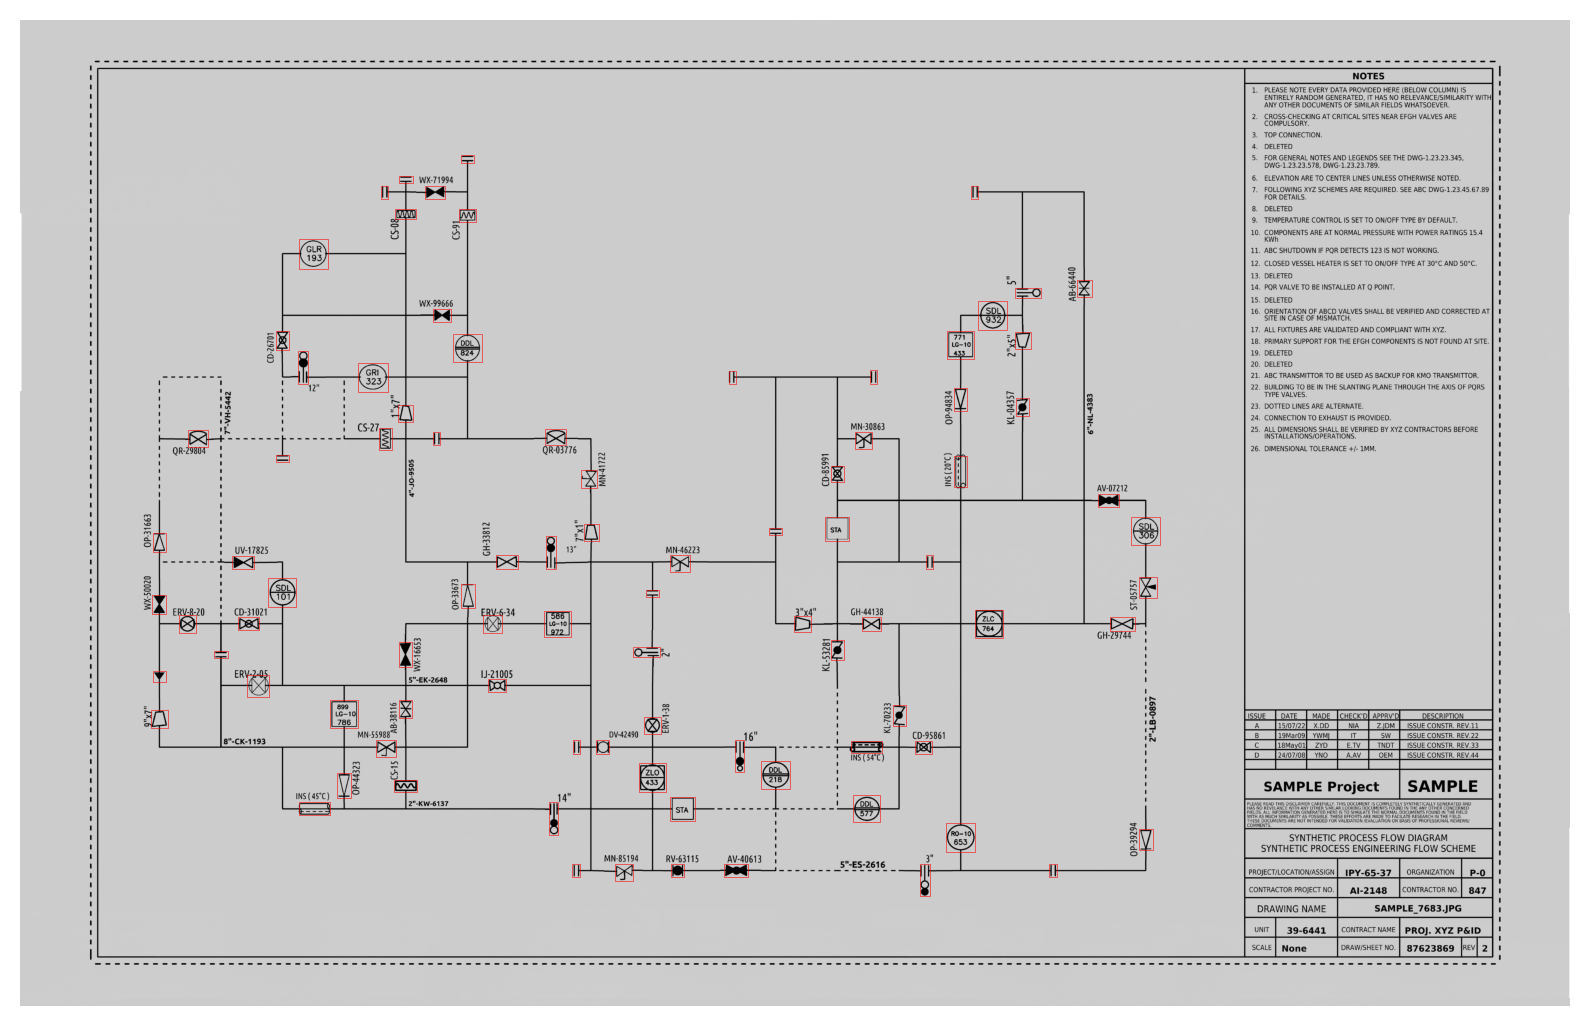

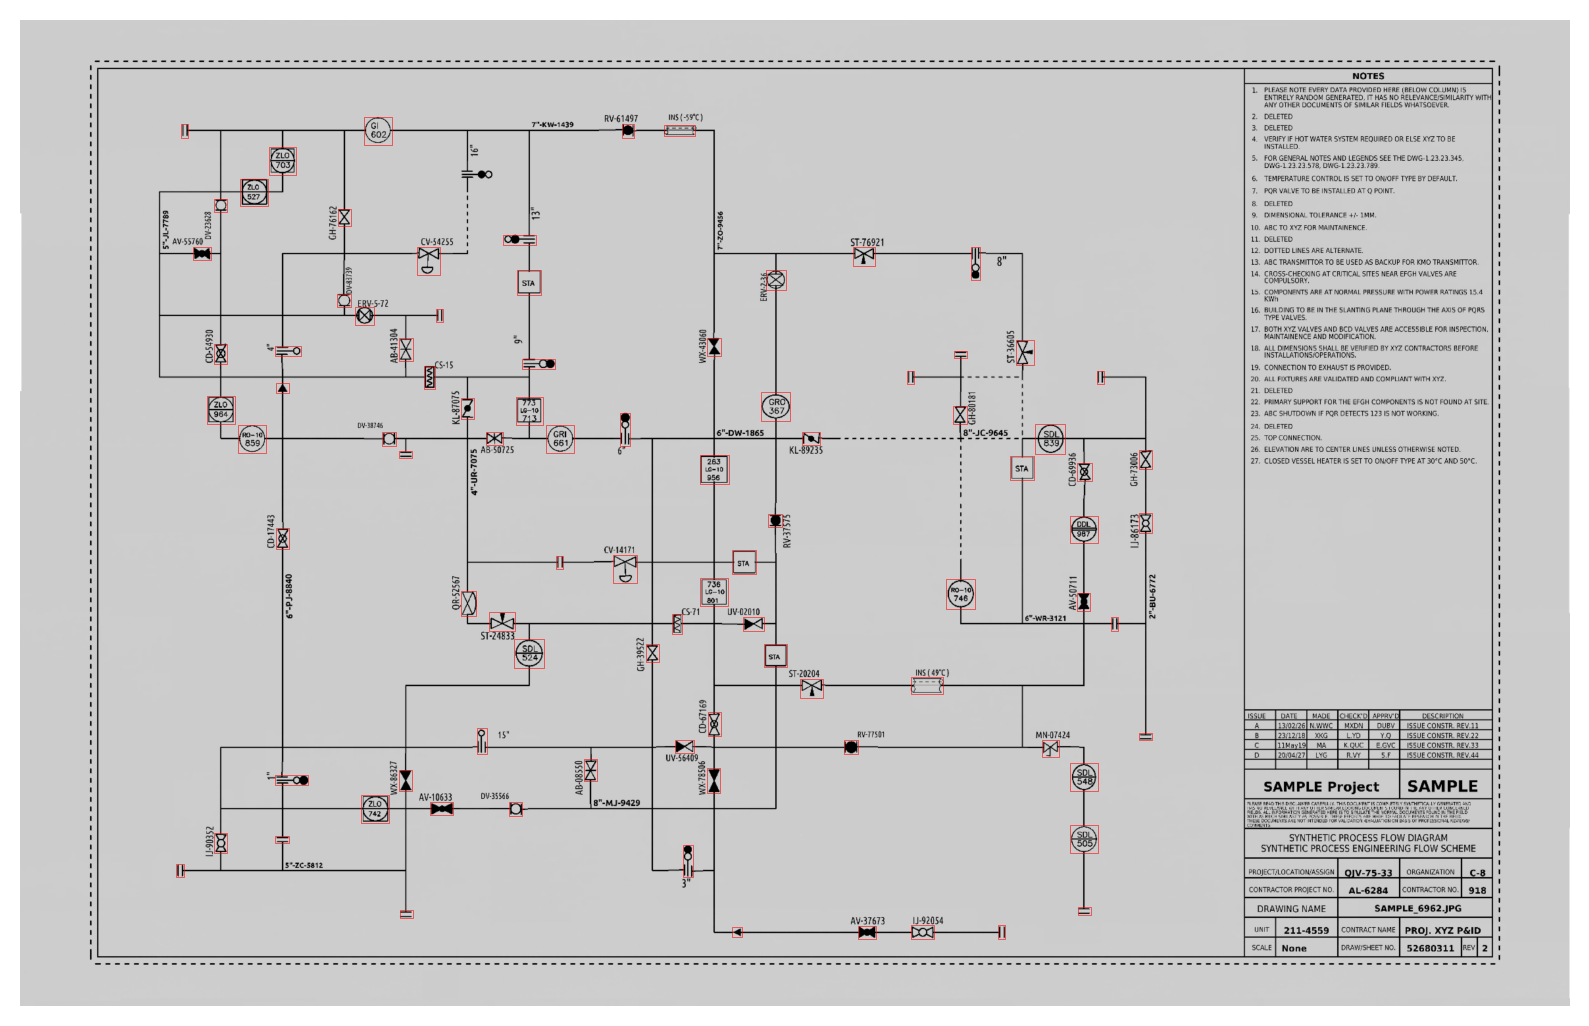

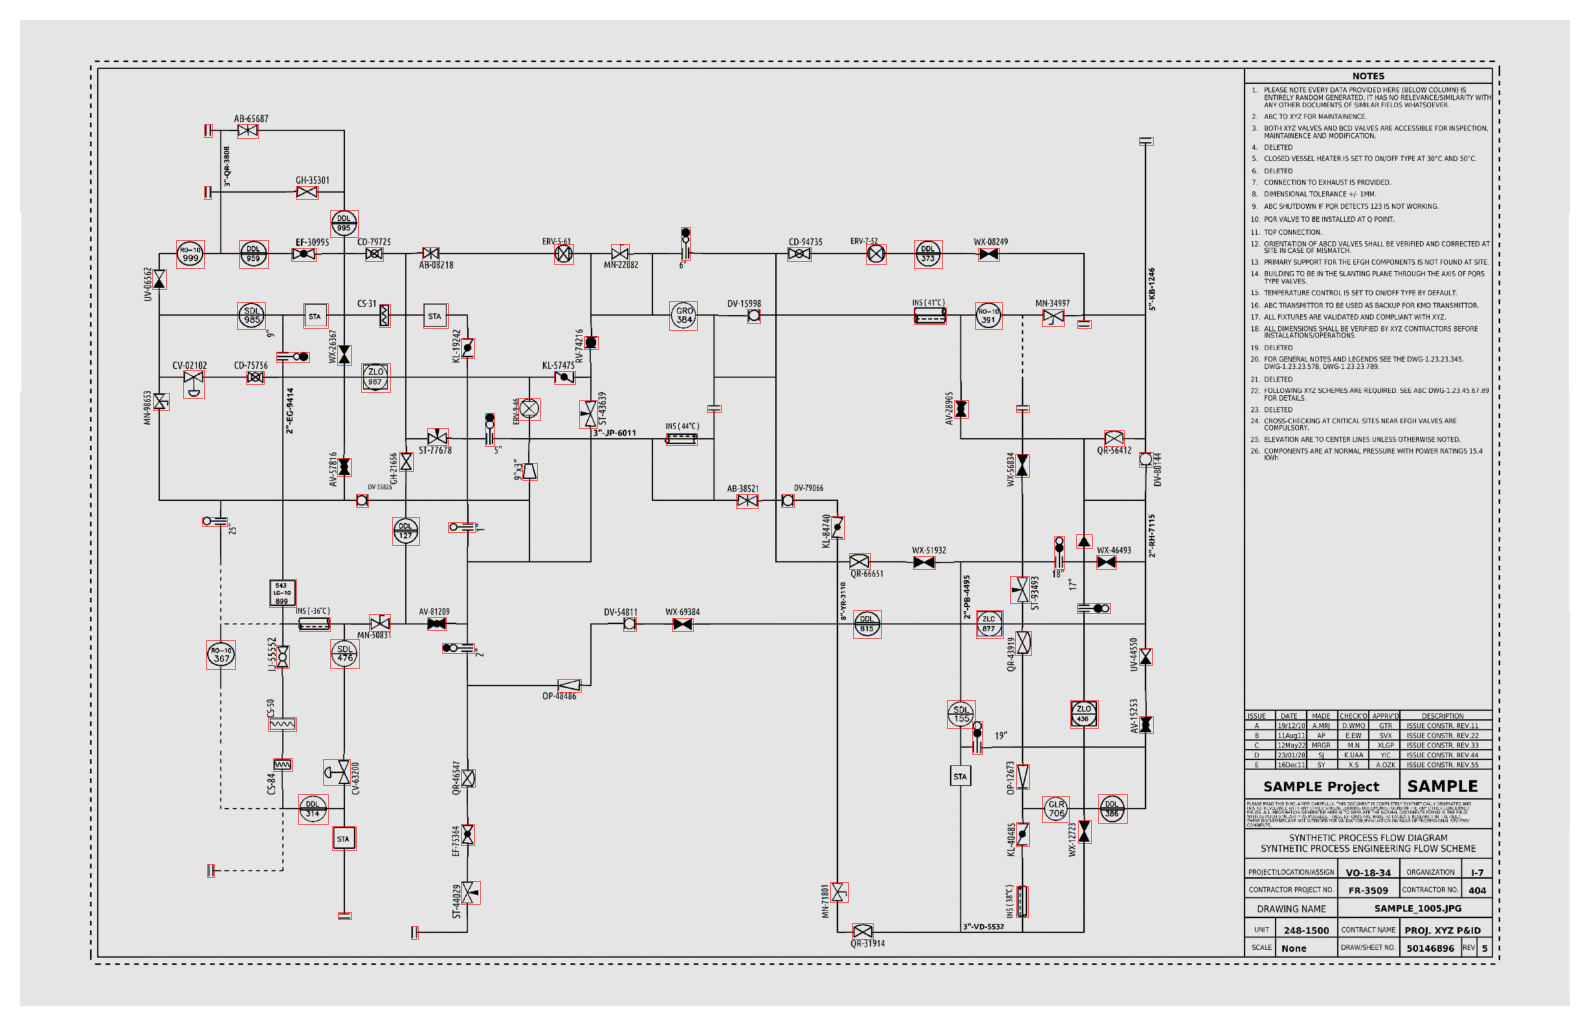

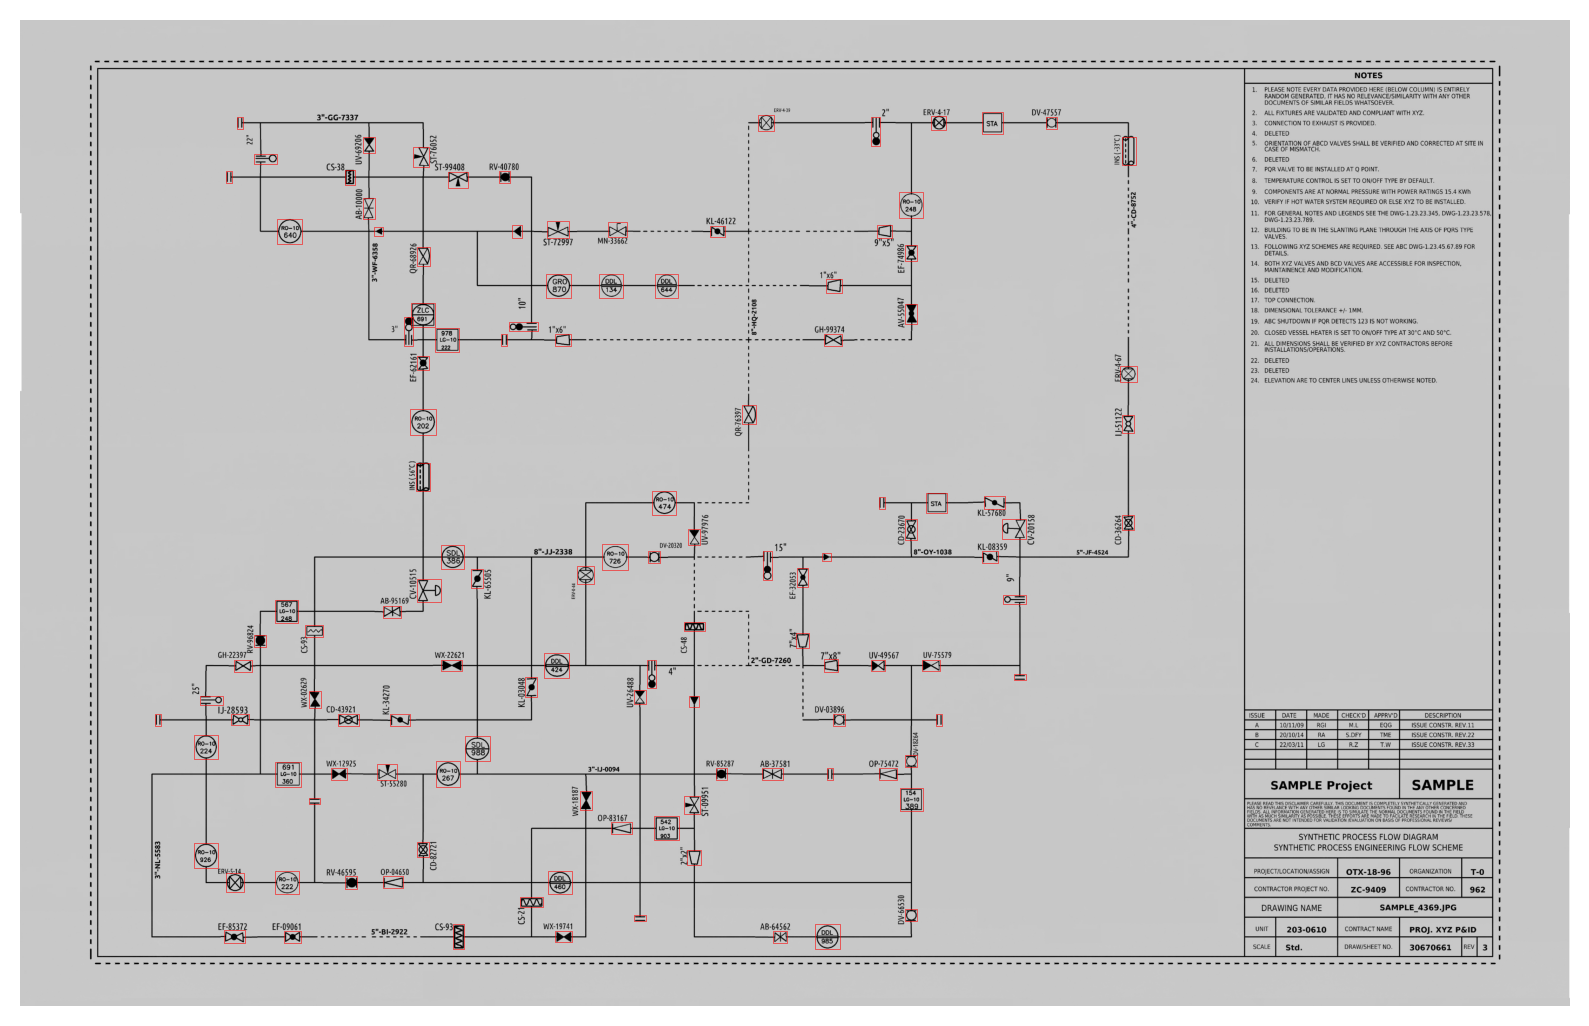

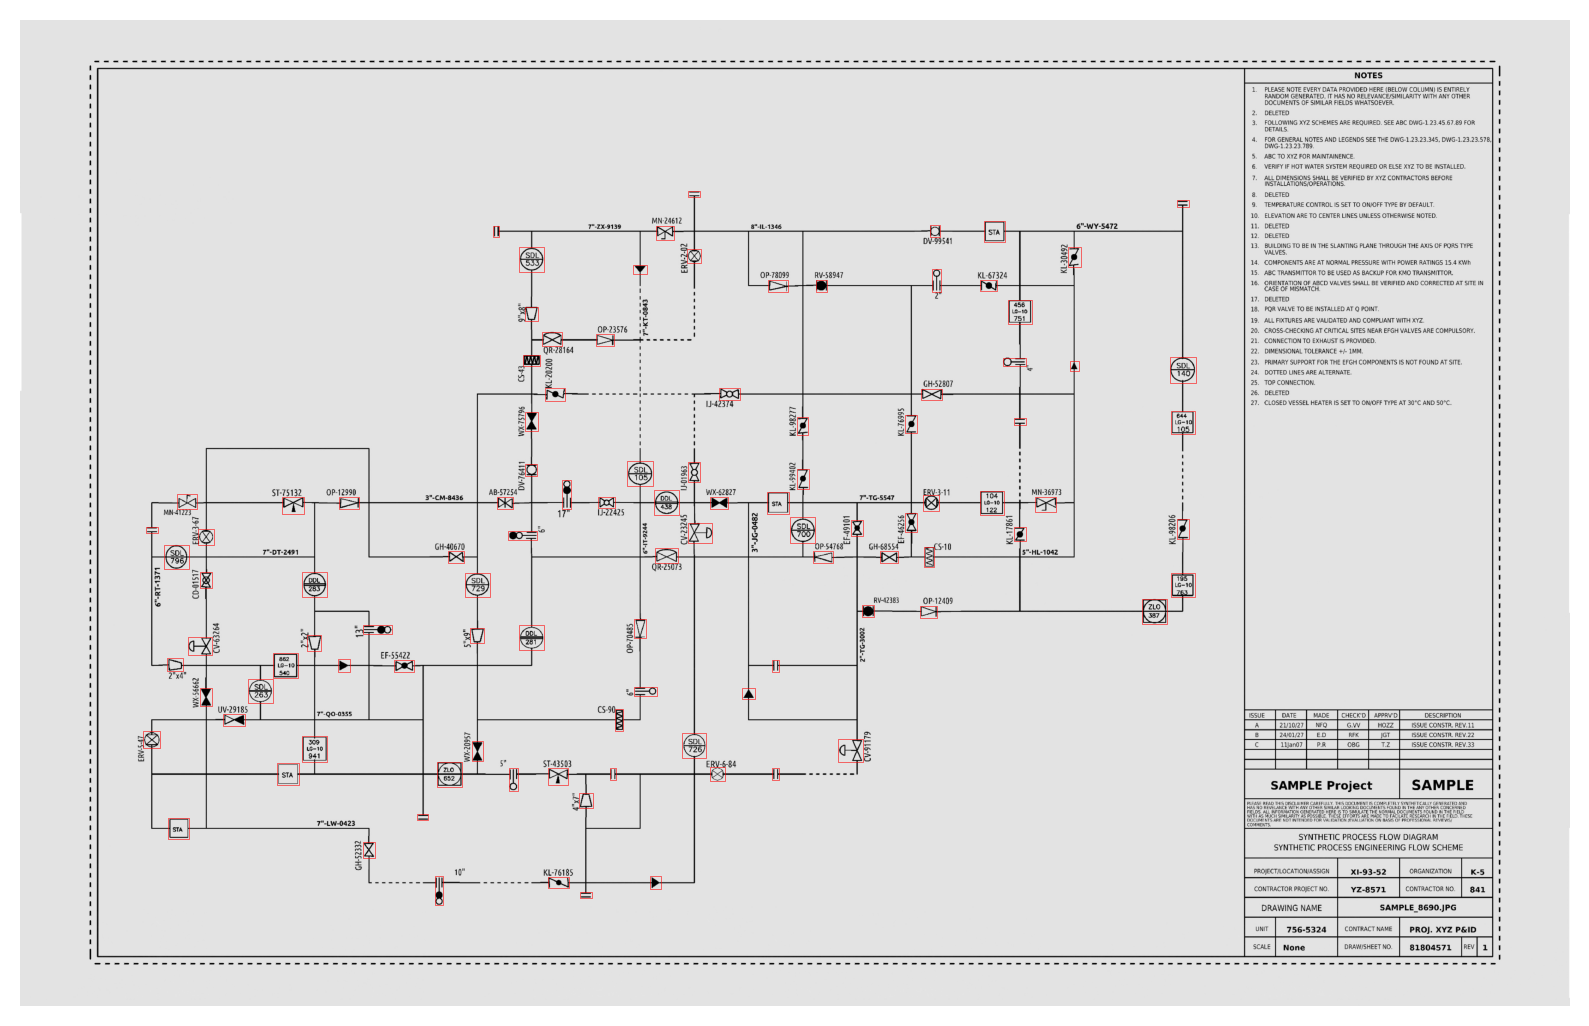

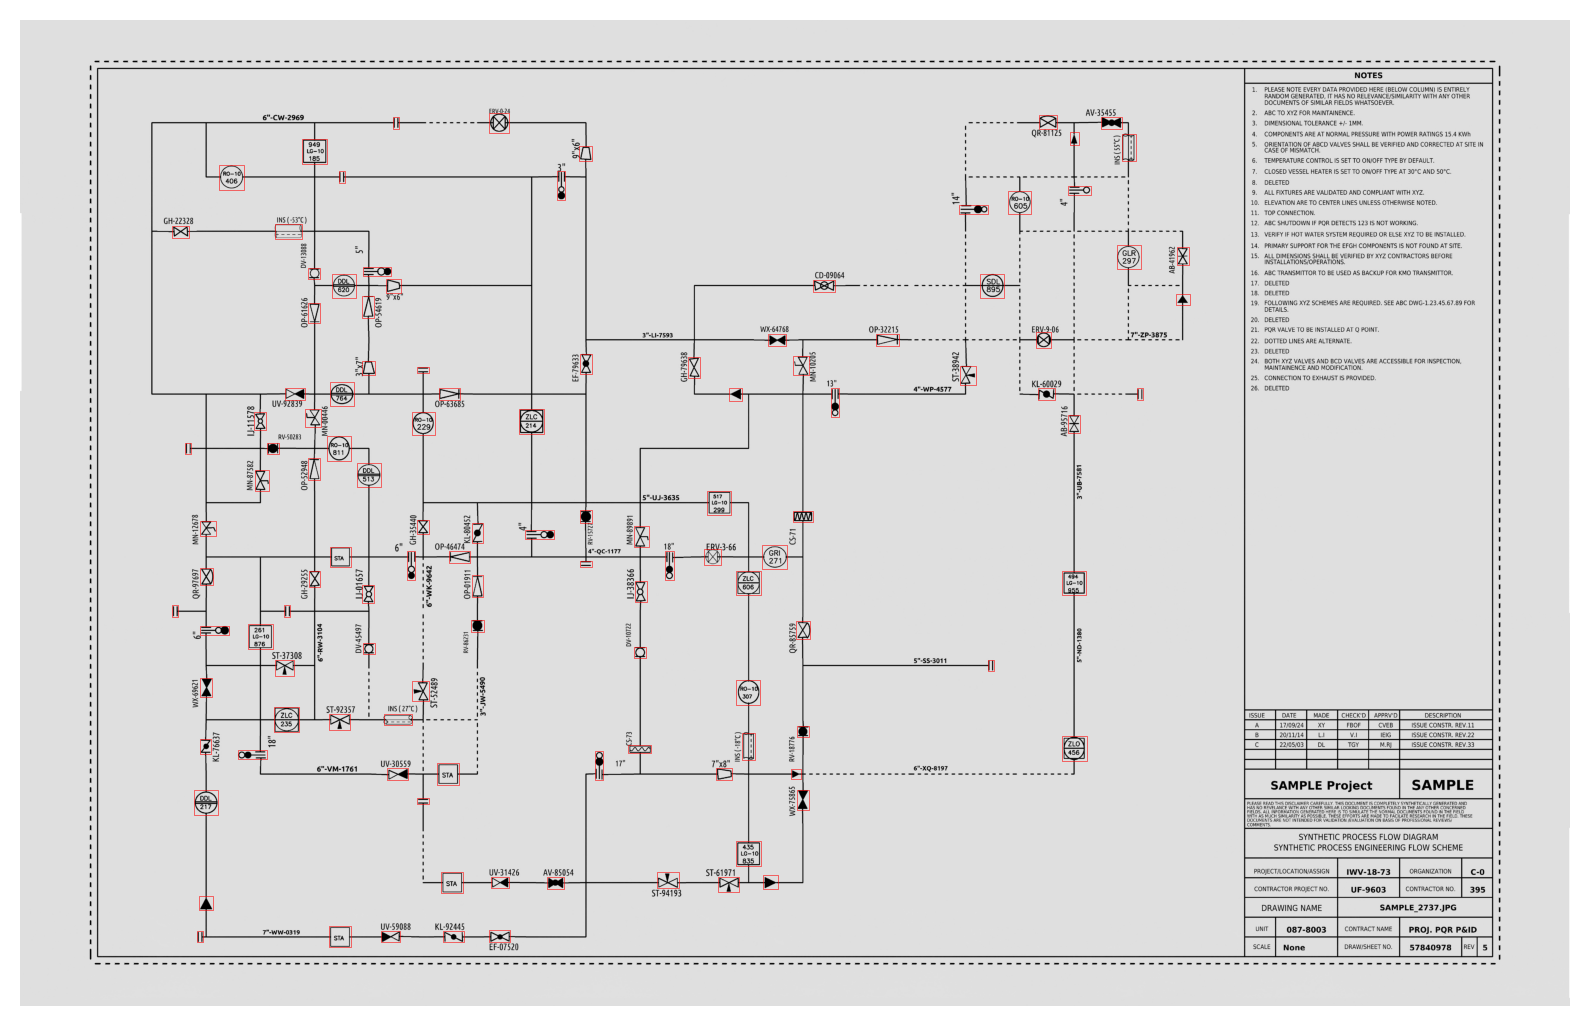

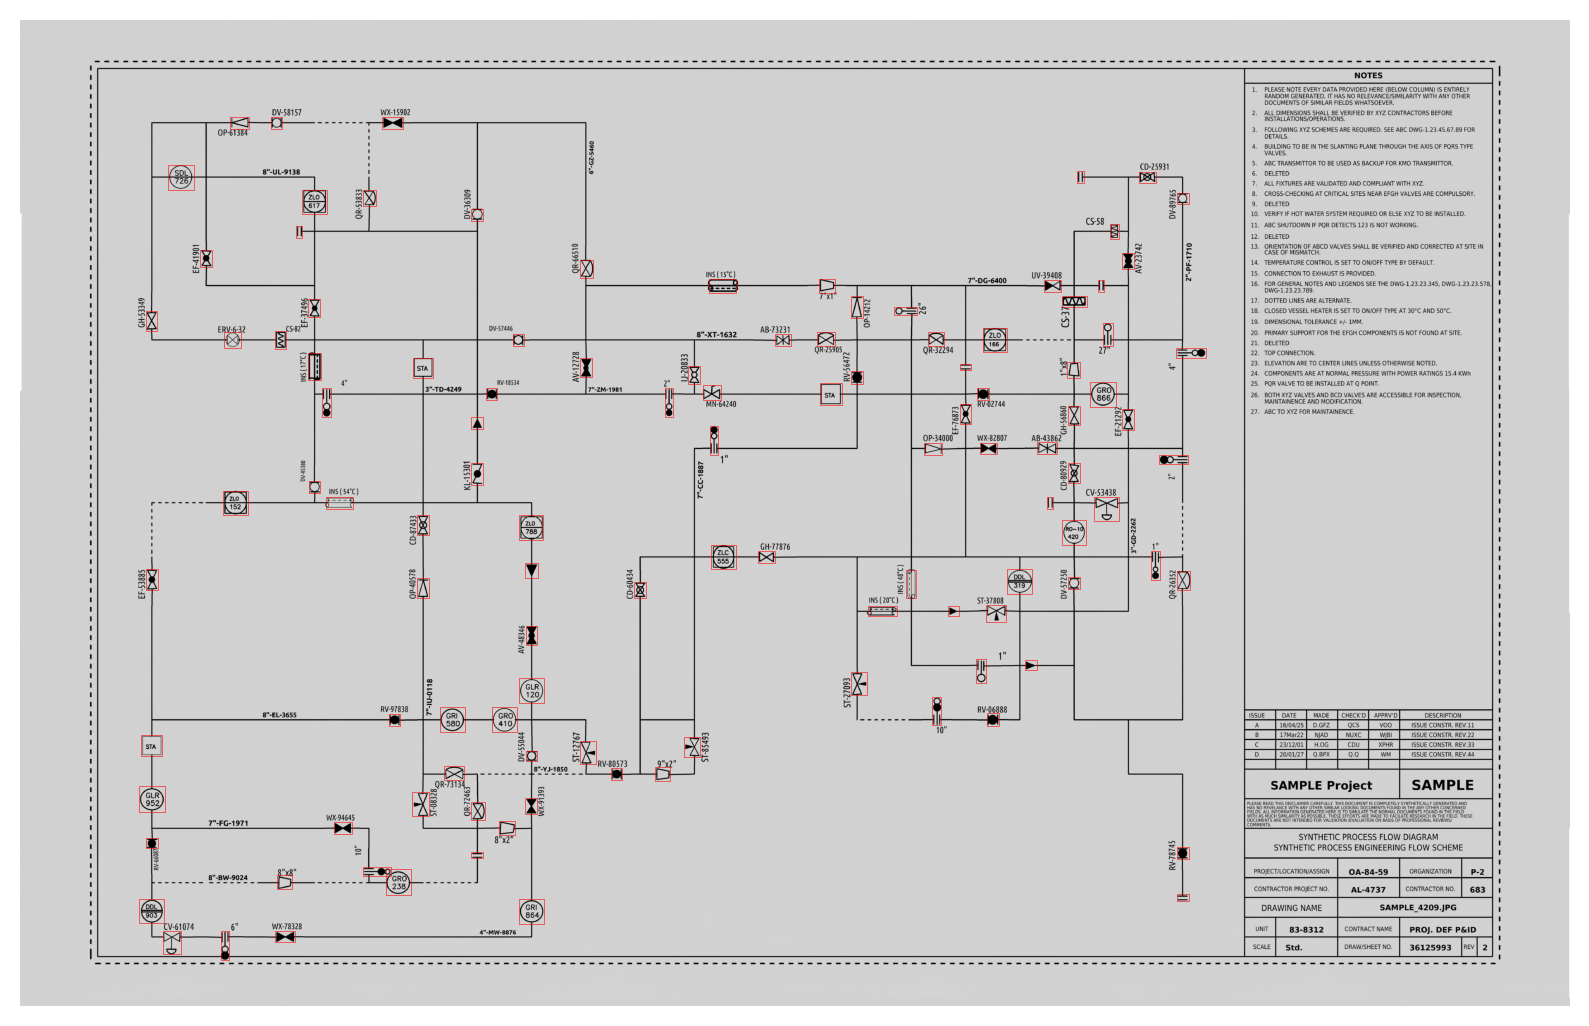

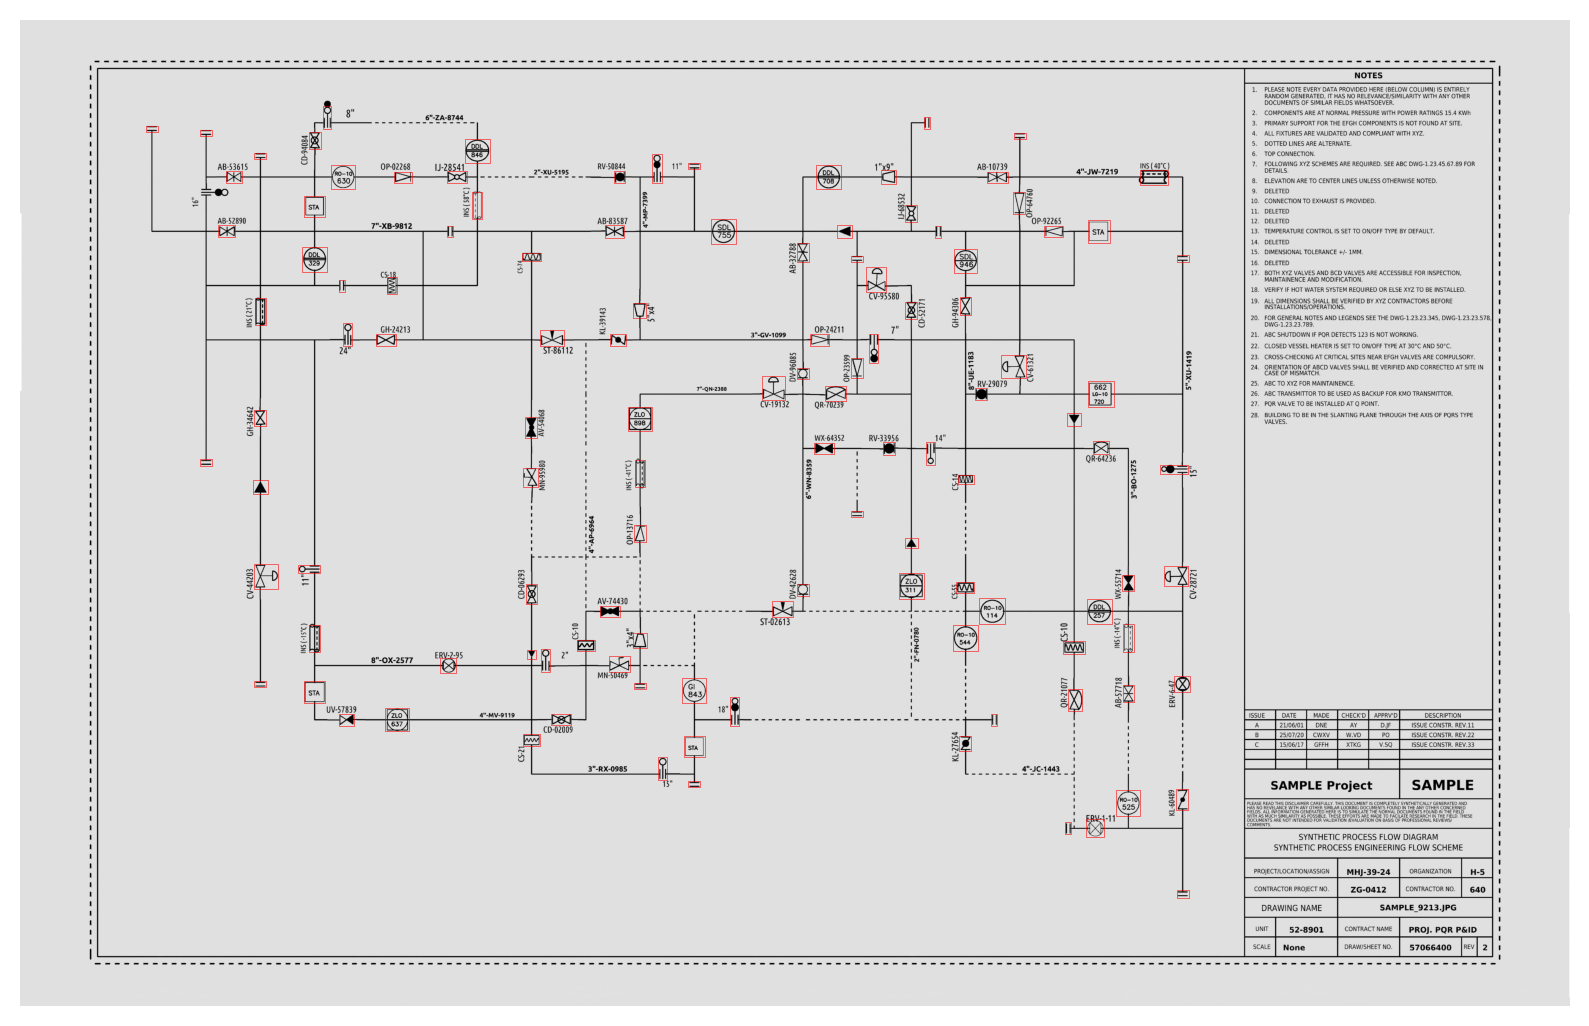

In [7]:
from src.services.image_display_serivce import ImageDisplayService


def bbox_name(d):
    bbox = convert_points_to_bounding_box([d[0][0], d[0][1], d[0][2], d[0][3]])
    return bbox

for index, result in enumerate(pid_results):
    display_service = ImageDisplayService(
        image_path=datapoints_to_test[index].image_path,
        bounding_boxes=list(map(bbox_name, result))
    )

    display_service.display_image_with_bbox()

In [14]:
from PIL import Image
from src.utils.segment_image import segment_image 

image = Image.open("D:/Bentler/project-planner-image.png")

images_2d = segment_image(image, chunk_size=3240)
# result_image = []

# for image_row in segment_image(image, chunk_size=3240):
#     result_image.append([*image_row])

for index_row, row in enumerate(images_2d):
    for index_col, col in enumerate(row):
        col.save(f"./segments/{index_row}_{index_col}.png")